In [191]:
#Ejercicio 02 de Algebra Lineal SVD y PCA
#Autor : Enrique Alvarado

#Cargamos librerias
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [192]:
#utilizaremos el dataset de peleas de MMA ganadas por peleador
data = "./data/MMA Fighters  Gyms.csv"
df = pd.read_csv(data, encoding='Latin1')

In [193]:
df.head()

,title,country,stance,reach,age,weightClass,trainingCenter,wins,loses,draws,tkos,tko wins,tko lose,subs,subs win,subs lose
0,Pete Spratt,USA,Orthodox,NaN,47.0,Lightweight,NaN,12,18,0,5 1,5,1,5 14,5,14
1,Jonny Carson,USA,NaN,NaN,NaN,Lightweight,Skrap Pack,11,7,0,2 0,2,0,6 7,6,7
2,Sergio Quinones,USA,NaN,NaN,NaN,Featherweight,NaN,11,19,0,1 5,1,5,7 9,7,9
3,Alvin Cacdac,USA,Orthodox,NaN,NaN,Flyweight,NaN,17,13,0,8 2,8,2,7 9,7,9
4,Vincent Latoel,NETHERLANDS,NaN,NaN,39.0,Featherweight,NaN,16,18,2,7 3,7,3,7 14,7,14


In [194]:
df = df.dropna(axis = 0)

In [195]:
df.shape

(703, 16)

In [196]:
#Voy a convertir esta categorica a numerica, creo que será importante es la postura del peleador
df['stance'].unique()

array(['Orthodox', 'Southpaw'], dtype=object)

In [201]:
dummy = pd.get_dummies(df['stance'])
df = pd.concat([df, dummy], axis = 1)

In [202]:
df.head()

,title,country,stance,reach,age,weightClass,trainingCenter,wins,loses,draws,tkos,tko wins,tko lose,subs,subs win,subs lose,Orthodox,Southpaw
5,Johnny Bedford,USA,Orthodox,"71.0""",35.0,Bantamweight,Fitness Fight Factory,23,13,1,10 2,10,2,9 11,9,11,1,0
7,Joshua Burkman,USA,Orthodox,"72.0""",37.0,Welterweight,The Pit Elevated Fight Team,28,17,0,7 2,7,2,10 9,10,9,1,0
9435,Syuri Kondo,JAPAN,Orthodox,"66.0""",29.0,Women's Strawweight,Vos Gym,6,1,0,1 1,1,1,0 - 0,0,0,1,0
9489,Hugo Viana,BRAZIL,Orthodox,"67.5""",35.0,Bantamweight,Champion Team,8,4,0,1 2,1,2,0 - 0,0,0,1,0
9542,Yoel Romero,CUBA,Southpaw,"73.5""",41.0,Middleweight,American Top Team,13,3,0,11 1,11,1,0 - 0,0,0,0,1


In [203]:
#convierto la variable alcance "reach" a string y luego la hacemos numerica
df['reach'] = df['reach'].astype('string')
df['reach'] = df['reach'].str.extract(r'(\d+.\d+)').astype('float')

In [205]:
#Que no tenga nulos
df.isna().sum()


title             0
country           0
stance            0
reach             0
age               0
weightClass       0
trainingCenter    0
wins              0
loses             0
draws             0
tkos              0
tko wins          0
tko lose          0
subs              0
subs win          0
subs lose         0
Orthodox          0
Southpaw          0
dtype: int64

In [219]:
#vamos a tomar 6 variables para el PCA
features =['reach','Orthodox','Southpaw','age','wins', 'subs win']

In [220]:
features

['reach', 'Orthodox', 'Southpaw', 'age', 'wins', 'subs win']

In [221]:
#Separamos las caracteristicas 
x = df.loc[:, features].values

In [222]:
#Vemos nuestra matriz de caracteristicas
x

array([[71.,  1.,  0., 35., 23.,  9.],
       [72.,  1.,  0., 37., 28., 10.],
       [66.,  1.,  0., 29.,  6.,  0.],
       ...,
       [62.,  1.,  0., 32., 15.,  9.],
       [70.,  1.,  0., 39., 23.,  9.],
       [77.,  1.,  0., 44., 35.,  9.]])

In [223]:
#Se separan el target: seran las peleas ganadas por Ko
y = df.loc[:,['tko wins']].values

In [225]:
x = StandardScaler().fit_transform(x)
#¿Qué efecto hace la función StandardScaler a x? ¿Podrías explicarlo en términos de lo visto en álgebra lineal y estadístico?
#R: remueve la media y divide entre la desviacion estandar

In [232]:
#Dejemos que sklearn haga su trabajo, por ejemplo pidiéndole 2 component
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

In [233]:
#¿Cuál es el máximo de componentes principales que puedo pedir?
#Se pueden pedir hasta el numero de caracteristicas
matrixComponents = pd.DataFrame(data = principalComponents, columns = ['reach','Orthodox','Southpaw','age','wins', 'subs win'])
#¿Cómo sé qué tantas componentes es pertinente tomar en cuenta para mis datos?
#Es util la cantidad de varianza explicada por los N primeros componentes 

In [228]:
#Usa los comandos explained_variance_ o explained_variance_ratio_ para
#tomar una decisión informada. Por ejemplo, grafica número de componentes vs el
#radio de la varianza explicada.
print(pca.explained_variance_ratio_)

[3.51161034e-01 3.01519864e-01 1.64523534e-01 1.26123471e-01
 5.66720977e-02 1.42080489e-32]


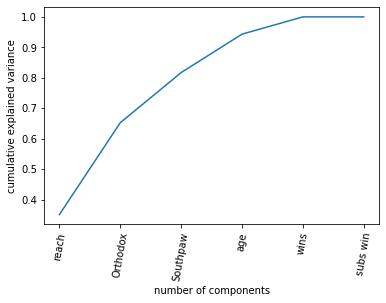

In [229]:
#En este caso Vemos que con los primeros tres componentes explicamos mas del 80% de mi varianza 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,6),
          ['reach','Orthodox','Southpaw','age','wins', 'subs win'], rotation=80)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()